In [1]:
# Importation des bibliothèques necessaires
# CV2 de OpenCV pour la lecture et le traitement d'image
import cv2
# Os pour importer la base de données
import os
# Numpy pour le calcule matricielle et matplotlib.pyplot pour la dataviz
import numpy as np
import matplotlib.pyplot as plt
# Tensorflow et keras pour construire le réseau de neurones 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  0


In [2]:
# Fonction pour automatiser le traitement d'image
def traitement_img (img) : 
    if img is not None:
    # Changement des couleurs en nuances de gris
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Changement de la taille de l'image 
        img = cv2.resize(img, (128, 128))
    # Normalisation des pixels de l'image (division sur 255)
        img = img / 255
    return img
    print (f"échec de traitement de le l'image {img}")

In [3]:
path_no_tumor_train = "C:/Users/zzaka/OneDrive/Bureau/notumor_train"
path_tumor_train = "C:/Users/zzaka/OneDrive/Bureau/tumor_train"

no_tumor_images_train = os.listdir(path_no_tumor_train)
tumor_images_train = os.listdir(path_tumor_train)

training_dataset = []
training_label = []


In [4]:
import cv2

image_path = "C:/Users/zzaka/OneDrive/Bureau/tumor_train/Tr-gl_0012.jpg"

# Tenter de charger l'image
image = cv2.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is not None:
    print("Image chargée avec succès!")
    # Voir l'image chargée
    cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print(f"Échec du chargement de l'image à partir de {image_path}")


Image chargée avec succès!


In [5]:
# Boucle pour les images sans tumeur
for image_name in no_tumor_images_train:
    full_path = os.path.join(path_no_tumor_train, image_name)  # Construction du chemin complet

    # Charger l'image
    image = cv2.imread(full_path)
    
    # Vérifier si l'image a été chargée correctement
    if image is None:
        print(f"Impossible de charger l'image {full_path}.")
        continue

    # Conversion en niveaux de gris et redimensionnement
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0  # Normalisation des valeurs des pixels

    # Ajouter l'image et l'étiquette à leurs listes respectives
    training_dataset.append(img)
    training_label.append(0)  # 0 pour 'sans tumeur'

# Boucle pour les images avec tumeur
for image_name in tumor_images_train:
    full_path = os.path.join(path_tumor_train, image_name)  # Construction du chemin complet

    # Charger l'image
    image = cv2.imread(full_path)
    
    # Vérifier si l'image a été chargée correctement
    if image is None:
        print(f"Impossible de charger l'image {full_path}.")
        continue

    # Conversion en niveaux de gris et redimensionnement
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0  # Normalisation des valeurs des pixels

    # Ajouter l'image et l'étiquette à leurs listes respectives
    training_dataset.append(img)
    training_label.append(1)  # 1 pour 'avec tumeur'

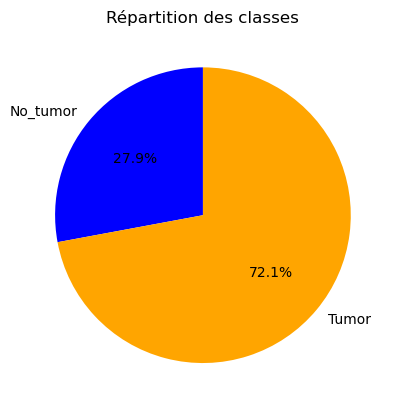

In [6]:
# Compter le nombre d'occurrences de chaque classe
counts = [training_label.count(0), training_label.count(1)]

# Définir les étiquettes pour les classes
labels = ['No_tumor', 'Tumor']

# Créer un diagramme 
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)

# Ajouter le titres 
plt.title('Répartition des classes')

# Afficher le diagramme
plt.show()

In [7]:
# Transformer les images en matrice de pixel avec numpy
training_dataset = np.array(training_dataset)
training_label = np.array(training_label)

# On mélange les listes des labels et des matrices d'images
training_dataset, label = shuffle(training_dataset,training_label)

print("taille du dataset : ", len(training_dataset))
print("shape du dataset : ", training_dataset.shape)

print("taille des label : ", len(training_label))
print("shape du label : ", training_label.shape)

taille du dataset :  5712
shape du dataset :  (5712, 128, 128)
taille des label :  5712
shape du label :  (5712,)


In [8]:
# Diviser la base de données en ensemble de test et d'entrainement
X_train, X_test_val, y_train, y_test_val = train_test_split(training_dataset, training_label,test_size=0.25)

In [9]:
# Vérifier le types des variables X et Y
print(X_train.dtype)
print(y_train.dtype)

# Vérifier qu'aucune liste n'a de valeur nulle
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train)))

# Vérifier le shape de X et Y pour programmer l'entrée et la sortie du modèle
print(X_train.shape)
print(y_train.shape)

float64
int32
False
False
(4284, 128, 128)
(4284,)


In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Initialiser des listes vides pour stocker les résultats de l'entrainement des modèles ainsi que les modèles entrainés
#liste_faux_negatifs = []
#accuracies = []
#modeles = []

# Initialiser une liste contenant les nombres de kernel que l'on souhaite tester
#taille_kernel = [16, 32, 64]

# Bdeux boucles pour tester toutes les combianisons possible entre le nombre de kernel et la taille des kernels
#for i in range (1, 7):
#    for e in taille_kernel :

# Initialiser un modèle séquentielle qu'on va compiler par la suite (pour rajouter les couche manuellement)
model = Sequential()

# Couche d'entrée : convolution (le modèle reçoit des images dont la matrice est  de taille 128 par 128 
model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 1), padding='same',kernel_initializer='uniform',activation='relu'))

# Couches cachées :
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64,activation='relu'))

# Couche de sortie
model.add(Dense(1,activation='sigmoid'))

# Compilation des couches du modèles
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

# Entrainement du modèle
history = model.fit(X_train, y_train, epochs=5)
        #modeles.append(model)

# Evaluation sur la base de test
loss, accuracy = model.evaluate(X_test_val, y_test_val)
        #accuracies.append(accuracy)
print("Accuracy : ", accuracy)
print("Loss : ", loss)

        # Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_val)
y_pred_classes = (y_pred > 0.5).astype("int32")

        # Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test_val, y_pred_classes)

        # Extraction des faux négatifs et ajout à la liste
faux_negatifs = conf_matrix[1, 0]
        #liste_faux_negatifs.append(faux_negatifs)
print("Nombre de faux négatives : ", faux_negatifs)

Epoch 1/5
134/134 [==============================] - 73s 526ms/step - loss: 0.5980 - accuracy: 0.7213
Epoch 2/5
134/134 [==============================] - 73s 546ms/step - loss: 0.5965 - accuracy: 0.7218
Epoch 3/5
134/134 [==============================] - 71s 527ms/step - loss: 0.5948 - accuracy: 0.7218
Epoch 4/5
134/134 [==============================] - 71s 530ms/step - loss: 0.5930 - accuracy: 0.7218
Epoch 5/5
45/45 [==============================] - 5s 101ms/step - loss: 0.5954 - accuracy: 0.7178
Accuracy :  0.7177870869636536
Loss :  0.5954132080078125
45/45 [==============================] - 5s 108ms/step
Nombre de faux négatives :  0


In [14]:
# Enregistrement du modèle avec la bibliothèque keras
model.save("C:/Users/zzaka/OneDrive/Bureau/modele_opti_deuxclasses.keras")